## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [76]:
! git clone https://github.com/DS3001/knn

fatal: destination path 'knn' already exists and is not an empty directory.


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [78]:
# 1) Load dataset
data = pd.read_csv('./knn/data/USA_cars_datasets.csv')
data = data.loc[:,['price','mileage','year']]
print(data.shape) # there are 2499 rows and 3 columns

(2499, 3)


In [79]:
data.head()

,price,mileage,year
0,6300,274117,2008
1,2899,190552,2011
2,5350,39590,2018
3,25000,64146,2014
4,27700,6654,2018


In [80]:
data.describe() # there are no NA values, because there are 2499 instances for each of the 3 columns.

,price,mileage,year
count,2499.000000,2.499000e+03,2499.000000
mean,18767.671469,5.229869e+04,2016.714286
std,12116.094936,5.970552e+04,3.442656
min,0.000000,0.000000e+00,1973.000000
25%,10200.000000,2.146650e+04,2016.000000
50%,16900.000000,3.536500e+04,2018.000000
75%,25555.500000,6.347250e+04,2019.000000
max,84900.000000,1.017936e+06,2020.000000


In [81]:
# 2) Maxmin normalize year/range

def maxminnormal(val):
  return (val-min(val)) / (max(val)-min(val))

data['year'] = maxminnormal(data['year'])
data['mileage'] = maxminnormal(data['mileage'])

data.head()

,price,mileage,year
0,6300,0.269287,0.744681
1,2899,0.187194,0.808511
2,5350,0.038892,0.957447
3,25000,0.063016,0.872340
4,27700,0.006537,0.957447


In [82]:
# 3) Splitting data into 80% training and 20% testing
y = data['price']
x = data.drop('price',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=100)

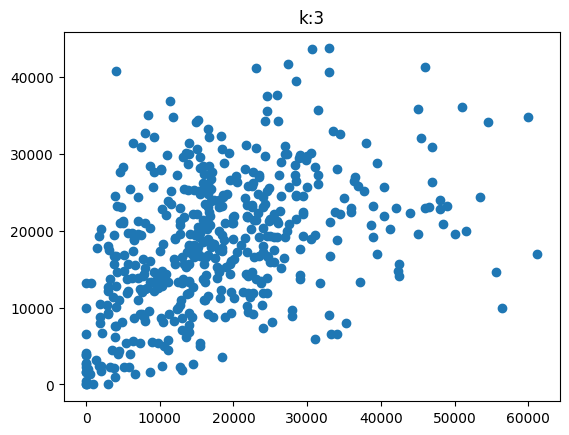

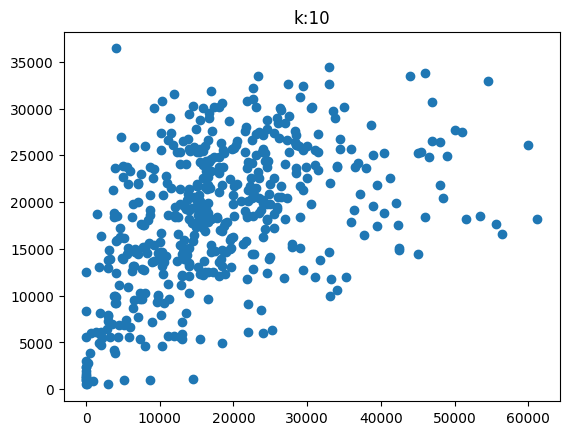

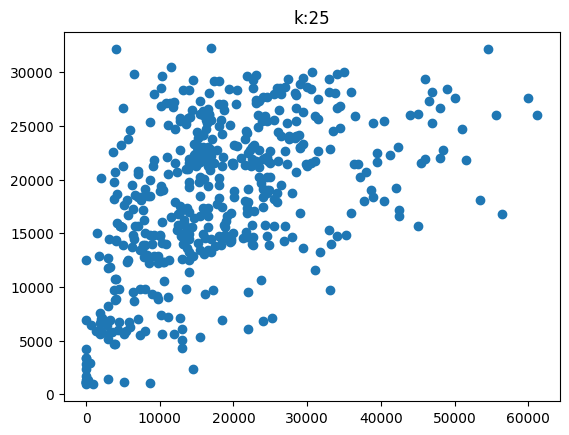

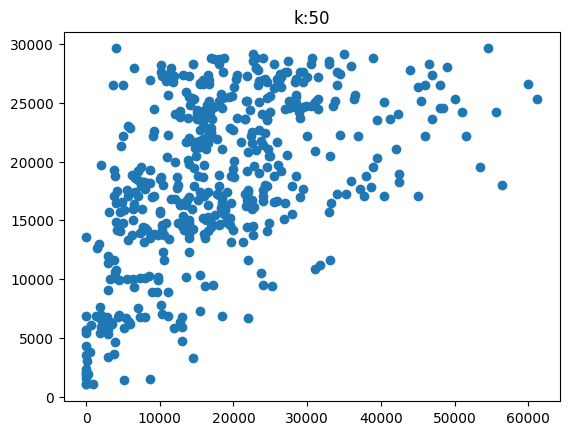

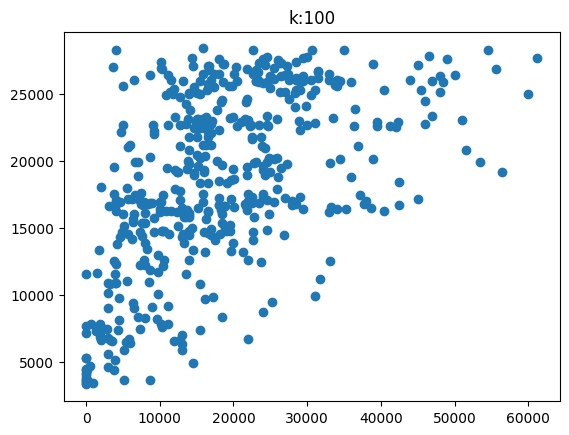

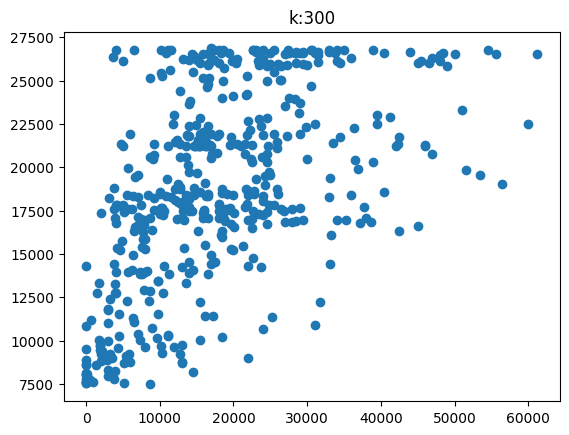

In [83]:
# 4) Performing kNN algorithm
k_values = [3, 10, 25, 50, 100, 300]
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)
    y_hat = model.predict(x_test)
    sse = np.sum((y_test - y_hat)**2) # calculate sse
    plt.scatter(y_test, y_hat)
    plt.title('k:'+str(k))
    plt.show()

> The strength of the linear correlation decreases as I increase k.

In [84]:
# 5) find optimal K value
sse_values = {}

for k in [3, 10, 25, 50, 100, 300]:
  model = KNeighborsRegressor(n_neighbors=k+1).fit(x_train,y_train)
  y_hat = model.predict(x_test)
  sse = np.sum((y_test-y_hat) ** 2)
  sse_values[k] = sse

optimal = min(sse_values, key=sse_values.get)
print(optimal)

100


> Since the optimal is 100, there is a underfitting for k values of 3, 10, 25, 50, and it is overfitting for the k value of 300.

>

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [85]:
# 1) Load health dataset
data = pd.read_csv('./knn/data/heart_failure_clinical_records_dataset.csv')
print(data.shape) # there are 299 row and 13 columns
data.describe() # there are no NA values as there are 299 instances for each column.
data = data.drop('time',axis=1)


(299, 13)


In [86]:
# 2) Correlation matrix
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


> Age, ejection _fraction, and serum_creatinine correlate strongest with DEATH_EVENT. The correlation values are 0.2537, -0.268, and 0.294 respectively.

In [87]:
# 3) Summary tables
vals = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for val in vals:
  print(data.loc[:,[val,'DEATH_EVENT']].groupby(val).describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

> The mean is higher when the variable takes the value 1 for high blood pressure and anaemia.

In [88]:
# 4) Matrix of variables that are most predictive of death
y = data['DEATH_EVENT']
X = data.loc[:,['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']]

In [89]:
# 5) Perform maxmin normalization on X
def maxminnormal(val):
  return (val-min(val))/(max(val)-min(val))
X = X.apply(maxminnormal)

In [90]:
# 6) 80:20 split of sample for training vs. testing
np.random.seed(50)
n = X.shape[0]
all_vals = np.arange(1,n)
training = np.random.choice(n,int(.8*n))
testing = [item for item in all_vals if item not in training]

x_train = X.iloc[training,:]
y_train = y.iloc[training]
x_test = X.iloc[testing,:]
y_test = y.iloc[testing]

In [91]:
# 7) optimal # of knn neighbors
k_bar = 20
grid = np.arange(1,k_bar)
sse = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predict = knn.fit(x_train,y_train)
    y_hat = knn.predict(x_test)
    sse[k] = np.sum((y_test-y_hat)**2)

sse_min = np.min(sse)
index_min = np.where(sse_min==sse)
star_k = grid[index_min]
print(sse)
print(star_k)


[43.         39.         36.11111111 31.125      29.48       26.88888889
 26.04081633 25.1875     24.54320988 24.86       25.32231405 25.42361111
 25.31360947 25.15816327 24.99111111 24.9453125  25.35640138 25.54012346
 25.21883657 25.225     ]
[9]


> The optimal numnber of neighbors for a kNN regression is 9.

In [92]:
# 8) Repeat steps 5-6 but use all variables except for time
X = data.drop('DEATH_EVENT',axis=1)
x_train = X.iloc[training,:]
y_train = y.iloc[training]
x_test = X.iloc[testing,:]
y_test = y.iloc[testing]

In [93]:
k_bar = 80
grid = np.arange(1,k_bar)
sse = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predict = knn.fit(x_train,y_train)
    y_hat = knn.predict(x_test)
    sse[k] = np.sum((y_test-y_hat)**2)

In [94]:
min_sse = np.min(sse) # highest recorded accuracy
index_min = np.where(sse==min_sse)
star = grid[index_min] # Find the optimal value of k
print(sse)
print(star)

[54.         47.         36.         33.875      33.4        32.27777778
 30.42857143 28.90625    28.69135802 28.69       29.37190083 29.39583333
 28.83431953 28.72959184 28.71111111 28.828125   28.88235294 29.0462963
 28.93074792 28.665      28.45578231 28.16115702 27.89224953 27.71875
 27.3056     26.96153846 26.73525377 26.98596939 27.28180737 27.40444444
 27.50052029 27.61230469 27.88521579 27.9783737  28.19918367 28.03858025
 28.00949598 27.80193906 27.88034188 27.828125   27.77513385 27.80952381
 27.89832342 28.00568182 28.12296296 28.10255198 28.15482119 28.17751736
 28.13577676 28.206      28.17800846 28.1612426  28.11641153 28.10219479
 28.27702479 28.34725765 28.30594029 28.35969084 28.41999425 28.37638889
 28.30018812 28.35015609 28.33786848 28.296875   28.24047337 28.17447199
 28.16796614 28.01881488 27.91346356 27.90183673 27.90914501 27.94020062
 27.89059861 27.85993426 27.83128889 27.8251385  27.83892731 27.80752794
 27.76093575 27.7384375 ]
[27]


> The optimal number of neighbors in this example is 27, and it also has a higher SSE. Thus, it is evident that the model with less neighbors is more useful for predicting.

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)